### EP4130 - ASSIGNMENT 1

In [1]:
import numpy as np
from scipy import stats as st
import astropy as ap
import astroML.stats as aml
import pandas as pd
import matplotlib.pyplot as plt

1.  Create 1000 draws from a normal distribution of mean of 1.5 and standard

    deviation of 0.5. Plot the pdf. Calculate the sample mean, variance,

    skewness, kurtosis as well as standard deviation using MAD and σG of these samples.

In [2]:
normal_dist_object = st.norm(1.5, 0.5)

draws1000 = normal_dist_object.rvs(size=1000)

print(f"Sample mean:    \t%.3f" % draws1000.mean())

print(f"Sample variance:    \t%.3f" % float(draws1000.sum()/999.0))

print(f"Kurtosis:       \t%.3f" % st.kurtosis(draws1000))

print(f"Skewness:   \t\t%.3f" % st.skew(draws1000))

print(f"MAD:    \t\t%.3f" % st.median_abs_deviation(draws1000))

print(f"\u03C3_G:    \t\t%.3f" % aml.sigmaG(draws1000))

Sample mean:    	1.505
Sample variance:    	1.507
Kurtosis:       	0.474
Skewness:   		0.156
MAD:    		0.326
σ_G:    		0.480


2.  Plot a Cauchy distribution with μ=0 and γ=1.5 superposed on the top a Gaussian distribution with μ=0 and σ=1.5. 

     Use two different line styles to distinguish between the Gaussan and Cauchy distribution on the plot and also indicate these in the legends.

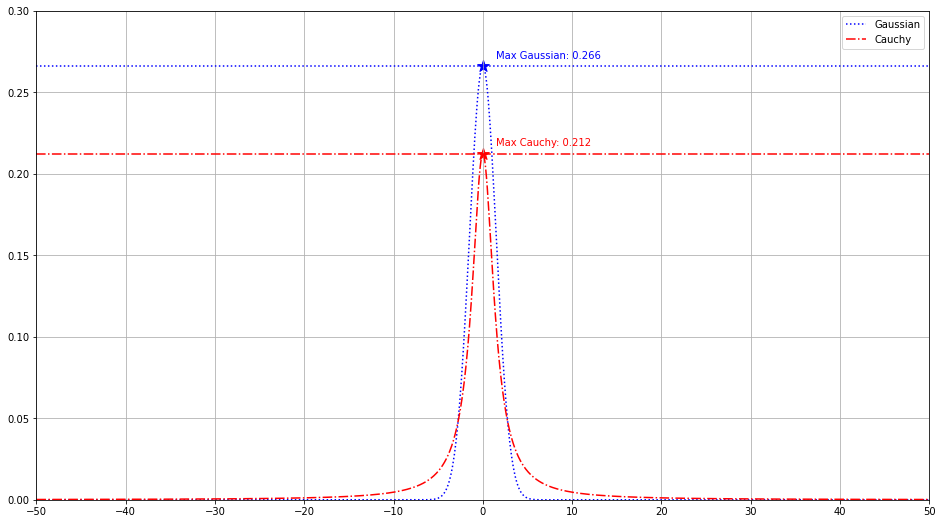

In [3]:
q2_cauchy = st.cauchy(0, 1.5).pdf(np.arange(-50, 50, 0.1))  #Generating Cauchy PDF for x in [-50, 50] with step size 0.1
q2_gaussian = st.norm(0, 1.5).pdf(np.arange(-50, 50, 0.1))  #Generating Gaussian PDF for x in [-50, 50] with step size 0.1

plt.figure(figsize=(16, 9))

#For Gaussian
plt.plot(np.arange(-50, 50, 0.1), q2_gaussian, label="Gaussian", color='b', ls = ':')
plt.hlines(np.max(q2_gaussian), -50, 50, color='b', ls = ':')
plt.scatter(0, np.max(q2_gaussian), color='b', s=150, marker='*')
plt.text(1.5, np.max(q2_gaussian)+0.005, f"Max Gaussian: {np.max(q2_gaussian):.3f}", color='b')

#For Cauchy
plt.plot(np.arange(-50, 50, 0.1), q2_cauchy, label="Cauchy", color='r', ls = '-.')
plt.hlines(np.max(q2_cauchy), -50, 50, color='r', ls = '-.')
plt.scatter(0, np.max(q2_cauchy), color='r', s=150, marker='*')
plt.text(1.5, np.max(q2_cauchy)+0.005, f"Max Cauchy: {np.max(q2_cauchy):.3f}", color='r')

plt.grid(which='both')
plt.ylim(0, 0.3)
plt.xlim(-50, 50)
plt.xticks(np.arange(-50, 51, 10))
plt.legend()
plt.show()

3.  Plot Poisson distribution with mean of 5, superposed on top of a Gaussian
distribution with mean of 5 and standard deviation of square root of 5.
    
    Use two different line styles for the two distributions and make sure the
plot contains legends for both of them.

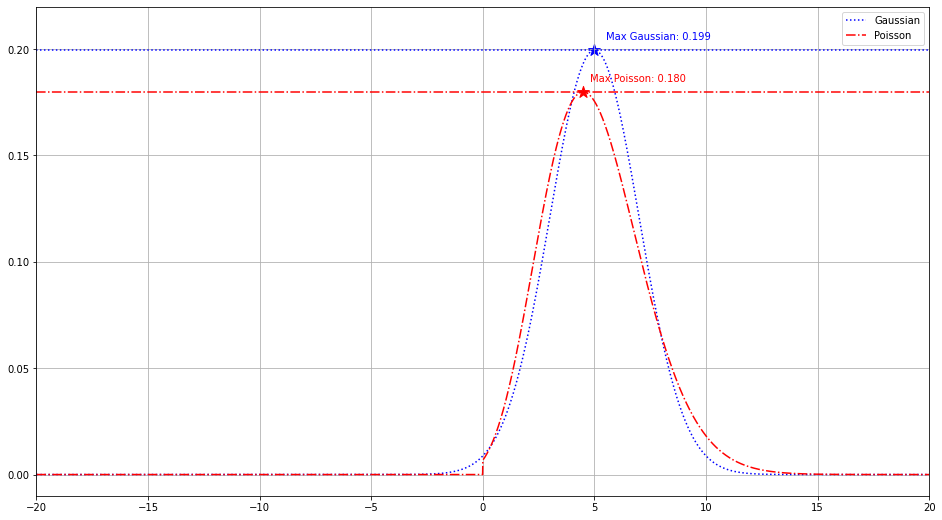

In [4]:
q3_poisson = st.poisson(5).pmf(np.arange(-20, 20, 0.01))    #Generating Poisson PDF for x in [-20, 20] with step size 0.01
q3_gaussian = st.norm(5, 2).pdf(np.arange(-20, 20, 0.01))   #Generating Gaussian PDF for x in [-20, 20] with step size 0.01

plt.figure(figsize=(16, 9))

#For Gaussian
plt.plot(np.arange(-20, 20, 0.01), q3_gaussian, label="Gaussian", color='b', ls = ':')
plt.hlines(np.max(q3_gaussian), -20, 20, color='b', ls = ':')
plt.scatter(np.arange(-20, 20, 0.01)[np.argmax(q3_gaussian)], np.max(q3_gaussian), color='b', s=150, marker='*')
plt.text(np.arange(-20, 20, 0.01)[np.argmax(q3_gaussian)] + 0.5, np.max(q3_gaussian)+0.005, f"Max Gaussian: {np.max(q3_gaussian):.3f}", color='b')

#For Poisson
plt.plot(np.arange(-20, 20, 0.01), q3_poisson, label="Poisson", color='r', ls = '-.')
plt.hlines(np.max(q3_poisson), -20, 20, color='r', ls = '-.')
plt.scatter(np.arange(-20, 20, 0.01)[np.argmax(q3_poisson)], np.max(q3_poisson), color='r', s=150, marker='*')
plt.text(np.arange(-20, 20, 0.01)[np.argmax(q3_poisson)] + 0.3, np.max(q3_poisson)+0.005, f"Max Poisson: {np.max(q3_poisson):.3f}", color='r')

plt.grid(which='both')
plt.ylim(-0.01, 0.22)
plt.xlim(-20, 20) 
#plt.xticks(np.arange(0, 21, 1))
plt.legend()
plt.show()


4.  The following were the measurements of mean lifetime of K meson (as of 1990) (in units of $10^{−10}$ s) :
    
    $0.8920±0.00044; 0.881±0.009; 0.8913±0.00032; 0.9837±0.00048; 0.8958 ± 0.00045$.

    Calculate the weighted mean lifetime and uncertainty of the mean.

    weighted mean = $\dfrac{\sum_i \dfrac{x_i}{\sigma^2_i}}{\sum_i \dfrac{1}{\sigma_i^2}}$

In [5]:
lifetimes = np.asfarray([0.892, 0.881, 0.8913, 0.9837, 0.8958])
errors = np.asfarray([0.00044, 0.009, 0.00032, 0.00048, 0.00045])

weighted_mean = np.sum(np.divide(lifetimes, np.square(errors)))/np.sum(np.divide(1, np.square(errors)))

print(f"Weighted mean of given samples: \t%.3f" % weighted_mean)

Weighted mean of given samples: 	0.909


5.  Download the eccentricity distribution of exoplanets from the exoplanet
catalog http://exoplanet.eu/catalog/.

    Look for the column titled e,
which denotes the eccentricity. Draw the histogram of this distribution.

    Then redraw the same histogram after Gaussianizing the distribution using the
    Box-transformation either using scipy.stats.boxcox 
    
    or from first principles using the equations shown in class 
    or in arXiv:1508.00931. Note that exoplanets without eccentricity data can be ignored.

In [6]:
exoplanet_data = pd.read_csv("exoplanet.eu_catalog.csv")
print(exoplanet_data['eccentricity'].count())

2144


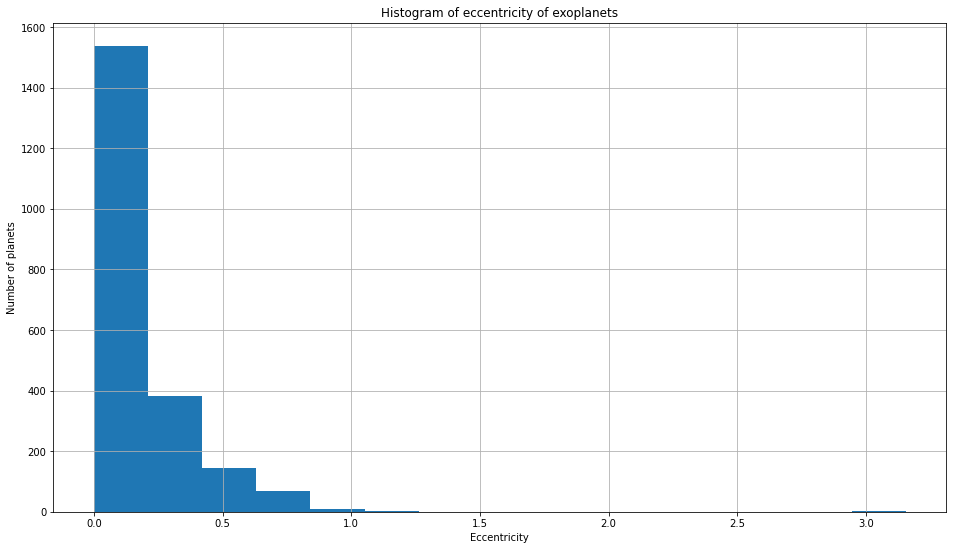

In [7]:
plt.figure(figsize=(16, 9))
plt.hist(exoplanet_data['eccentricity'], bins=15)
plt.grid(which='both')
plt.xlabel("Eccentricity")
plt.ylabel("Number of planets")
plt.title("Histogram of eccentricity of exoplanets")
plt.show()

#### scipy.stats.boxcox does not accept non-positive entries so all such entries are ignored.

In [8]:
for x in exoplanet_data.index:
  if not(exoplanet_data.loc[x, "eccentricity"] > 0):
    exoplanet_data.drop(x, inplace = True)
print(exoplanet_data['eccentricity'].count())

1703


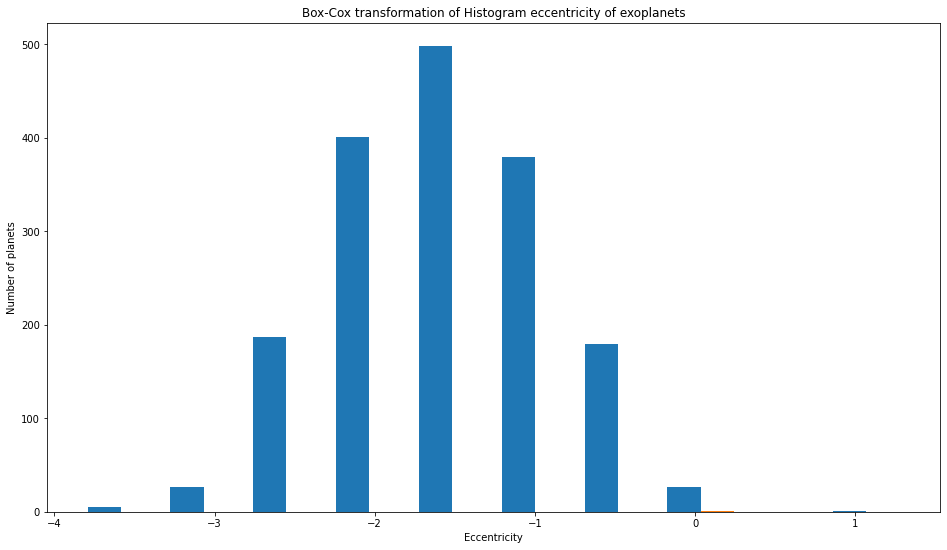

In [9]:
plt.figure(figsize=(16, 9))
plt.hist(st.boxcox(exoplanet_data['eccentricity']), bins=10)
plt.xlabel("Eccentricity")
plt.ylabel("Number of planets")
plt.title("Box-Cox transformation of Histogram eccentricity of exoplanets")
plt.show()